In [1]:
# For installing modelbit- used for cloud deployment
#!pip install modelbit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 964.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 3.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of types-requests to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runti

# Restart your Kernel after installing modelbit

In [1]:
import modelbit
mb = modelbit.login()

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/moezali1/modelbit/main/loans.csv')

In [4]:
data.head()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


# Exploratory Data Analysis

In [5]:
data.isnull().sum()

Applicant_ID             0
Age                      0
Annual_Income            0
Credit_Score             0
Employment_Years         0
Loan_Amount_Requested    0
Default                  0
dtype: int64

<Axes: xlabel='Default'>

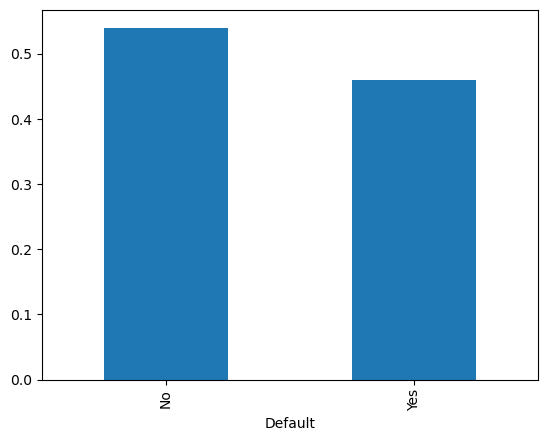

In [6]:
data['Default'].value_counts(normalize=True).plot.bar()

<Axes: >

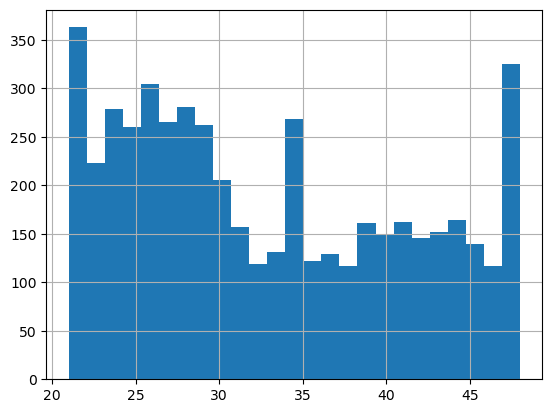

In [7]:
data['Age'].hist(bins=25)

<Axes: >

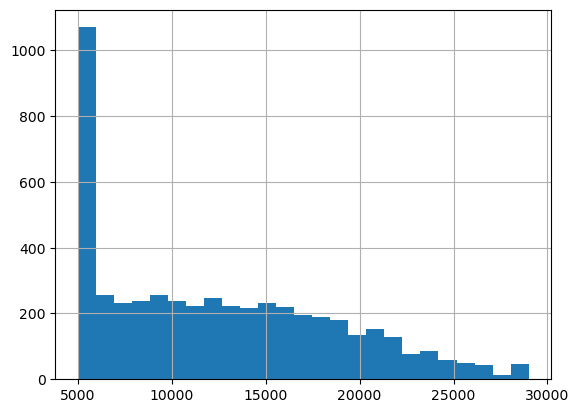

In [8]:
data['Loan_Amount_Requested'].hist(bins=25)

# Model/Pipeline Training and Selection

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# Features and target variable
X = data.drop(columns=['Default', 'Applicant_ID'])
y = data['Default']

# Columns to be scaled
numeric_features = ['Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']

# Column to be binned and one-hot encoded
categorical_features = ['Age']

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('bin', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [10]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3500, 5)
X_test: (1500, 5)
y_train: (3500,)
y_test: (1500,)


In [11]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [12]:
y_pred = pipeline.predict(X_test)
y_pred

array(['No', 'Yes', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [13]:
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
y_pred_prob

array([6.69689426e-05, 9.02806812e-01, 9.96185218e-01, ...,
       2.41424602e-02, 8.03381646e-01, 9.78944885e-01])

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test,y_pred)

0.9606666666666667

# Deployment Modelbit

In [18]:
import pandas as pd
import numpy as np

# first define function
def predict_loan_default(Age: int, Annual_Income: float, Credit_Score: int, Employment_Years: float, Loan_Amount_Requested: float)-> float:

  """
  Predict the probability of loan default using a pre-trained machine learning pipeline.

  Args:
      Age (int): Applicant's age.
      Annual_Income (float): Applicant's annual income.
      Credit_Score (int): Applicant's credit score.
      Employment_Years (float): Number of years employed.
      Loan_Amount_Requested (float): Requested loan amount.

  Returns:
      float: Probability of loan default.
  """

  return pipeline.predict_proba(pd.DataFrame([[Age, Annual_Income, Credit_Score, Employment_Years, Loan_Amount_Requested]],
                                             columns = ['Age', 'Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']))[:,1]

In [19]:
data.head(5)

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


In [20]:
predict_loan_default(32, 821233, 689, 1, 10789)

array([4.28870351e-27])

In [21]:
mb.deploy(predict_loan_default)

<div style="margin: 0; padding: 5px; line-height: 1.75; font-size: 14px; vertical-align: baseline; list-style: none; font-family: Roboto, Arial, sans-serif; background: none;">
  Deployment <span style="margin: 0; padding: 3px; line-height: 1.75; font-size: 13px; vertical-align: baseline; list-style: none; font-family: monospace; background: none; font-weight: 400; background-color: rgba(209, 213, 219, 0.2);">predict_loan_default</span>
</div>

# Call REST API Modelbit

## Prediction: No Default

In [22]:
modelbit.get_inference(
  workspace="jobinvarghese",
  deployment="predict_loan_default",
  data=[32, 821233, 689, 1, 10789]
)

{'data': [4.288703514360477e-27]}

In [23]:
!curl -s -XPOST "https://jobinvarghese.app.modelbit.com/v1/predict_loan_default/latest" -d '{"data": [32, 821233, 689, 1, 10789]}' | json_pp
# We can run this line of code in another google colab window from a different computer with modelbit logged in. As the machine learning algorithm is deployed, it will run in another colab window in a different computer
# "https://jobinvarghese.app.modelbit.com/v1/predict_loan_default/latest" is copied from modelbit website obtained by running the code "mb.deploy(predict_loan_default)"

'json_pp' is not recognized as an internal or external command,
operable program or batch file.


## Prediction: Default

## Using JSON library

In [24]:
import requests
import json

url = "https://jobinvarghese.app.modelbit.com/v1/predict_loan_default/latest"
headers = {
    'Content-Type': 'application/json'
}
data = {
    "data": [30, 53172, 588, 3, 5442]
}

response = requests.post(url, headers=headers, json=data)
response_json = response.json()

print(json.dumps(response_json, indent=4))

{
    "data": [
        0.9969505149674829
    ]
}
